In [3]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [7]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

In [11]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


In [37]:
grouped_df

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719
...,...,...
200,2018-08-26,1462
201,2018-08-28,1731
202,2018-08-29,1497
203,2018-08-30,1445


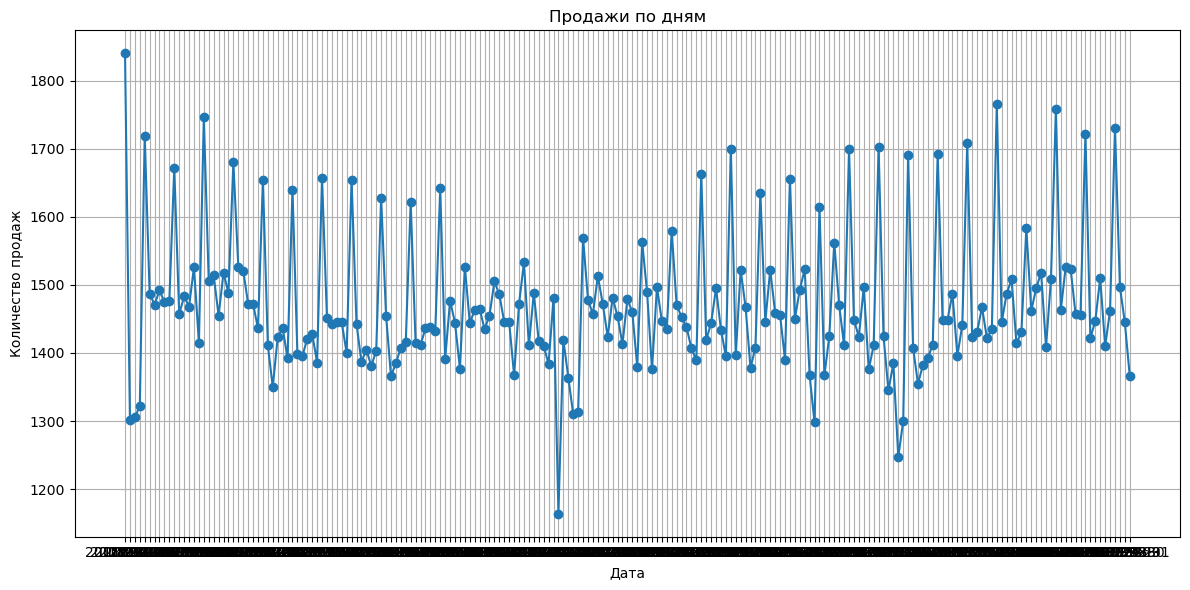

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Продажи по дням')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#Общая форма графика
#- Ось X (горизонтальная) — представляет даты, отсортированные по времени.
#- Ось Y (вертикальная) — показывает количество продаж, совершённых в каждый конкретный день.
#- Линия графика — соединяет точки, каждая из которых соответствует числу продаж в определённую дату.

#🔍 Возможные наблюдения
#- Тренды:
#- Если линия графика постепенно поднимается — это может свидетельствовать о росте продаж со временем.
#- Если наблюдается спад — возможно, снижение интереса или сезонный эффект.
#- Пики и провалы:
#- Резкие пики могут указывать на акции, праздники, маркетинговые кампании или выход новых продуктов.
#- Провалы — возможны в выходные, праздничные дни или периоды низкой активности.
#- Сезонность:
#- Если график показывает регулярные колебания (например, еженедельные или ежемесячные), это может быть связано с циклическим поведением покупателей.
#- Шум:
#- Если график сильно колеблется без явного тренда — возможно, данные нестабильны или зависят от внешних факторов.


In [61]:
q1 = df['Количество'].quantile(0.25)
q3 = df['Количество'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[df['Количество'] > upper_bound]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

In [31]:
q1 = grouped_df['Количество продаж'].quantile(0.25)
q3 = grouped_df['Количество продаж'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

outliers = grouped_df[grouped_df['Количество продаж'] > upper_bound]
max_outlier = outliers.loc[outliers['Количество продаж'].idxmax()]

In [33]:
print(max_outlier)

Дата                 2018-01-04
Количество продаж          1840
Name: 0, dtype: object


In [53]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
filtered = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.dayofweek == 2)  # Среда
]


In [39]:
weather = pd.read_excel('weather.xlsx')
weather['Дата'] = pd.to_datetime(weather['Дата'], errors='coerce')
weather_daily = (
    weather.groupby('Дата')['T']
    .mean()
    .reset_index()
    .rename(columns={'T': 'Температура'})
)

In [57]:
top_item = (
    filtered.groupby('Номенклатура')['Количество']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

In [59]:
print(top_item)

Номенклатура
product_1    2267
Name: Количество, dtype: int64


In [43]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], errors='coerce')

In [45]:
merged_df = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')

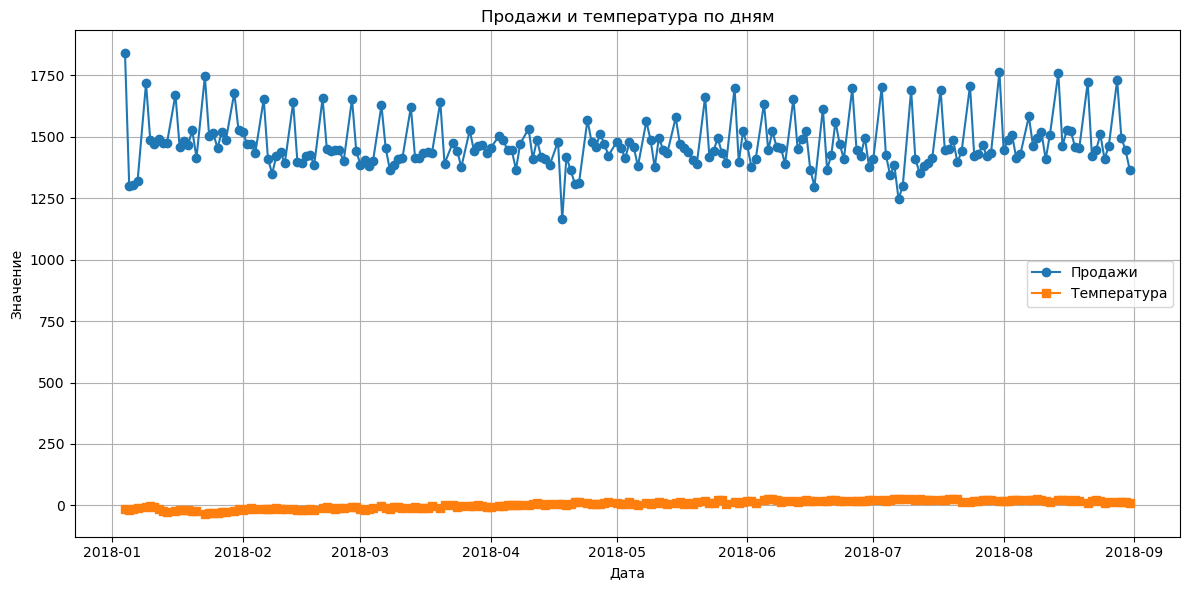

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Продажи', marker='o')
plt.plot(merged_df['Дата'], merged_df['Температура'], label='Температура', marker='s')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Продажи и температура по дням')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

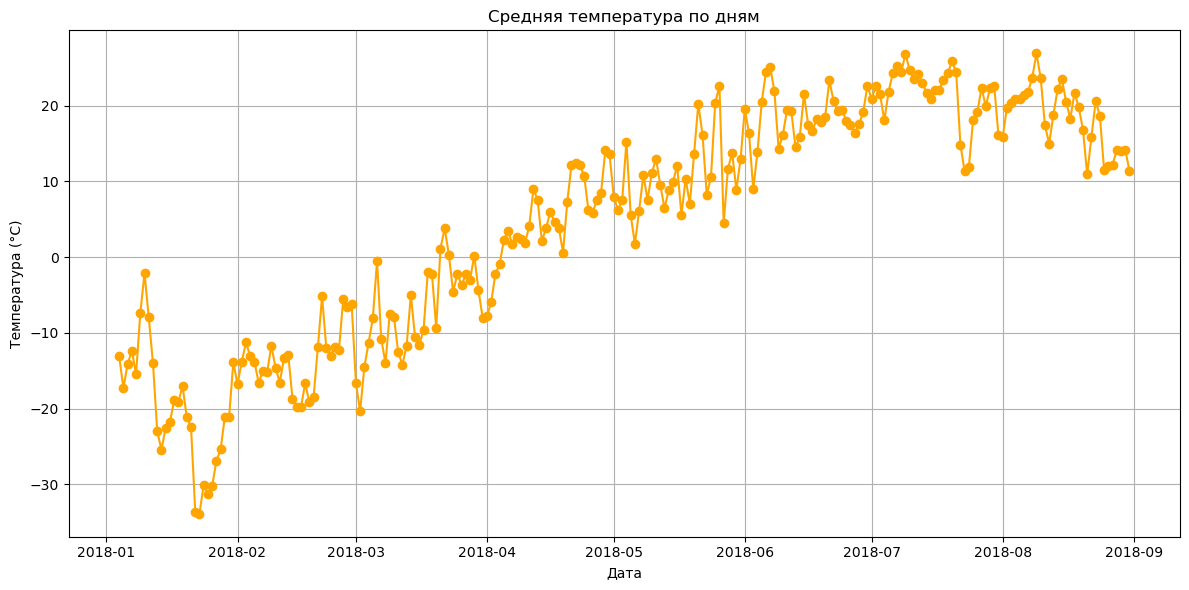

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(weather_daily['Дата'], weather_daily['Температура'], color='orange', marker='o')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя температура по дням')
plt.grid(True)
plt.tight_layout()
plt.show()